In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sns
import pandas as pd

# Load Dataset

In [12]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Extracting Features and Labels and Transform them to Tensors

In [14]:
X = torch.tensor(iris.iloc[:,:-1].values, dtype = torch.float32)

In [15]:
X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [16]:
y = torch.zeros(len(X), dtype = torch.long)
y[iris.species == 'setosa'] = 0
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [17]:
X.shape

torch.Size([150, 4])

In [18]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Creating Neural Network

In [19]:
# model = nn.Sequential(
#           nn.Linear(4,32),
#           nn.ReLU(),
#           nn.Linear(32,32),
#           nn.ReLU(),
#           nn.Linear(32,3),
#           )

In [20]:
class NN_Classifier(nn.Module):
  
  #defining layers
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(4,32)
    self.fc = nn.Linear(32,32)

    # Classification OR  output layer

    self.output = nn.Linear(32,3)

  # Forward pass
  def forward(self,x):

    # Pass the data through the input layer
    x = self.input(x)
    x = self.fc(x)

    # Apply ReLU activation
    x = F.relu(x)

    # output layer
    x = self.output(x)
    X = torch.sigmoid # This is not necessary because we are using cross entropy loss which already contains sigmoid.
    return x

# Create the instance of the model

In [21]:
model = NN_Classifier()

# Training The Model

In [22]:
learningRate = 0.01
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

epochs = 3501
losses = torch.zeros(epochs) # setting place holder for for loop.
for epoch in range(epochs):

    ypred = model(X)
    loss = lossfunc(ypred, y)
    losses[epoch] = loss.detach()

    if (epoch % 200) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')

    # Backpropagation

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())


 epochs : 0  loss :  1.15
 epochs : 200  loss :  0.42
 epochs : 400  loss :  0.25
 epochs : 600  loss :  0.16
 epochs : 800  loss :  0.12
 epochs : 1000  loss :  0.10
 epochs : 1200  loss :  0.08
 epochs : 1400  loss :  0.08
 epochs : 1600  loss :  0.07
 epochs : 1800  loss :  0.07
 epochs : 2000  loss :  0.07
 epochs : 2200  loss :  0.06
 epochs : 2400  loss :  0.06
 epochs : 2600  loss :  0.06
 epochs : 2800  loss :  0.06
 epochs : 3000  loss :  0.06
 epochs : 3200  loss :  0.06
 epochs : 3400  loss :  0.06


In [23]:
accuracy

tensor(97.3333)

# Visualizing Loss Vs Epochs

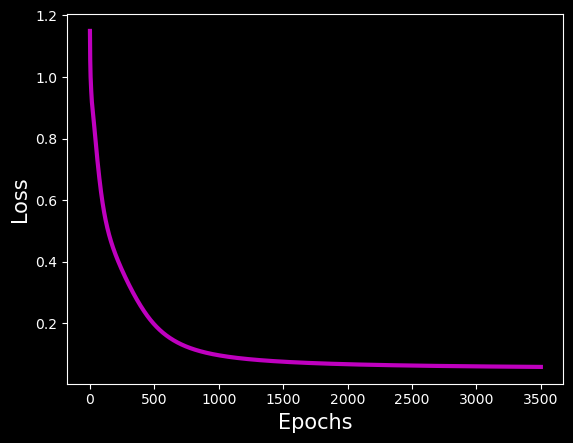

In [24]:
plt.plot(losses,'m', lw =3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

# Understanding Calculation of Accuracy

In [25]:
accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())

In [26]:
ypred  # Score of model Corresponding to the probability

tensor([[ 16.2730,   8.6289, -26.0188],
        [ 14.5280,   8.0054, -23.4006],
        [ 15.0478,   8.0127, -24.0886],
        [ 13.8722,   7.7181, -22.3692],
        [ 16.3197,   8.6106, -26.0812],
        [ 16.0324,   8.8391, -25.7934],
        [ 14.6934,   7.8678, -23.5124],
        [ 15.4795,   8.3824, -24.8263],
        [ 13.3141,   7.3936, -21.4667],
        [ 14.8538,   8.1740, -23.9056],
        [ 17.0574,   9.0528, -27.2593],
        [ 14.7196,   8.1220, -23.6853],
        [ 14.7662,   8.0378, -23.7175],
        [ 14.7017,   7.7022, -23.5405],
        [ 19.4485,   9.9333, -30.9940],
        [ 18.6562,   9.6760, -29.7131],
        [ 17.4374,   9.0539, -27.8021],
        [ 15.9166,   8.4794, -25.4526],
        [ 16.7239,   9.2141, -26.9192],
        [ 16.3597,   8.6757, -26.1319],
        [ 15.4391,   8.7134, -24.9768],
        [ 15.6785,   8.4541, -25.1227],
        [ 16.6980,   8.4535, -26.6315],
        [ 13.2147,   7.9050, -21.6166],
        [ 13.5110,   7.9831, -22.0148],


In [27]:
torch.argmax(ypred, axis =1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [28]:
(torch.argmax(ypred, axis =1)==y)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [29]:
(torch.argmax(ypred, axis =1)==y).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

In [30]:
torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(0.9800)

In [31]:
100 * torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(98.)